# Part 2. Data Exploration and Visual Analysis

In [1]:
# Import libraries and shared functions
from helpers import *

In [2]:
# Load cleaned dataset into a dataframe
df = pd.read_csv("hr_data.csv")

In [3]:
# Get numbers of people who left vs. stayed
print(df['left'].value_counts())

# Get percentages of people who left vs. stayed
print(df['left'].value_counts(normalize=True) * 100)

0    10000
1     1991
Name: left, dtype: int64
0    83.39588
1    16.60412
Name: left, dtype: float64


Around 17% of records (1991) are from the people who the company, 83% records (1000) are from the employees who currently work at the company.
Dataset is moderately imbalanced. 

In [4]:
# Calculate mean and median satisfaction scores of employees who left and those who stayed
df.groupby(['left'])['satisfaction_level'].agg([np.mean,np.median])

,mean,median
left,,
0,0.667365,0.69
1,0.440271,0.41


Average satisfaction level for employees who left the company is more than 20% lower compared to the employees who stayed.

#### Calculate average number of working hours per month 
 
 * Number of weeks in a year ~ 52.17
 * Number of holidays in a year in USA - 11 holidays
 * Approximate number of work weeks - 50
 * Full working hours a week - 40
 * Number of months in a year - 12

In [5]:
# Calculate average number of working hours per month considering standardized 40 hour workweek
avg_monthly_hours = round(50 * 40 / 12, 2)
avg_monthly_hours

166.67

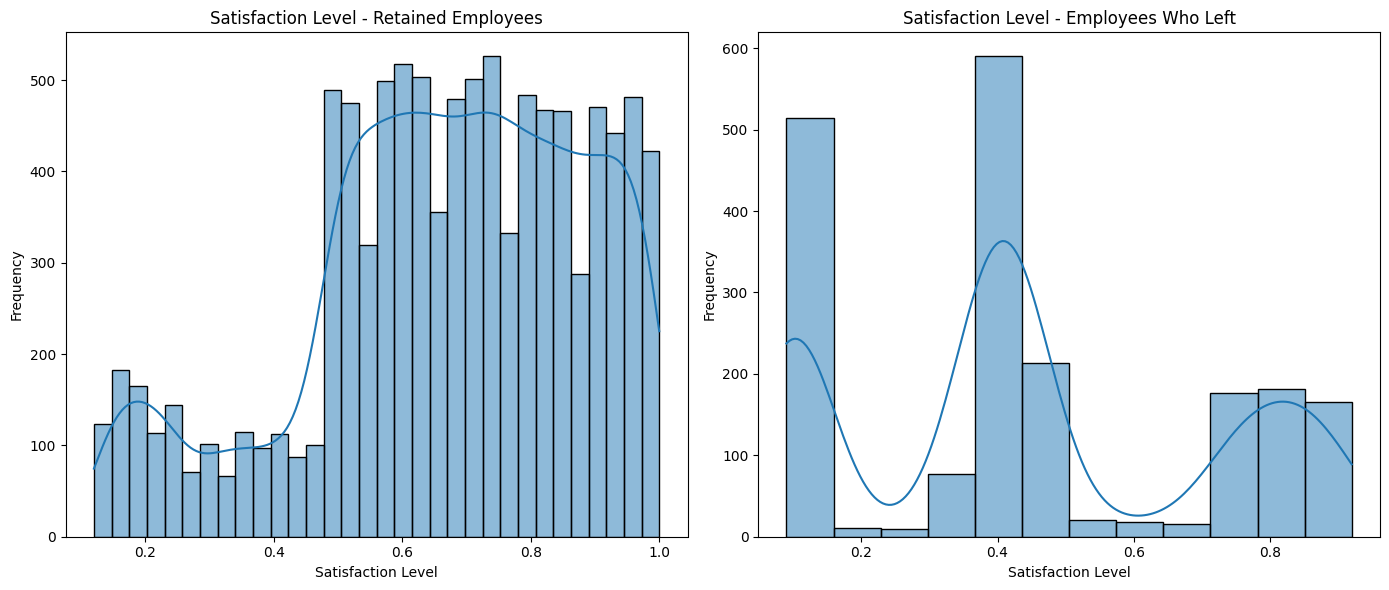

In [6]:
# Histogram of satisfaction levels
# Set up the figure and axes for two plots side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Histogram for Satisfaction Level for all records
sns.histplot(df[df['left'] == 0]['satisfaction_level'], kde=True, ax=axes[0])
axes[0].set_title('Satisfaction Level - Retained Employees')
axes[0].set_xlabel('Satisfaction Level')
axes[0].set_ylabel('Frequency')

# Histogram for Satisfaction Level for employees who left
sns.histplot(df[df['left'] == 1]['satisfaction_level'], kde=True, ax=axes[1])
axes[1].set_title('Satisfaction Level - Employees Who Left')
axes[1].set_xlabel('Satisfaction Level')
axes[1].set_ylabel('Frequency')

# Adjust the layout for better appearance
plt.tight_layout()

# Display the plot
plt.show()

Distribution of satisfaction levels between the employees who stayed and the ones who left is significantly different. Safisfaction levels of the employees who stayed form a left-skewed distribution meaning higher satisfaction rates. Satisfaction levels of the employees who left form a bimodal distribution with 2 peaks at low levels.

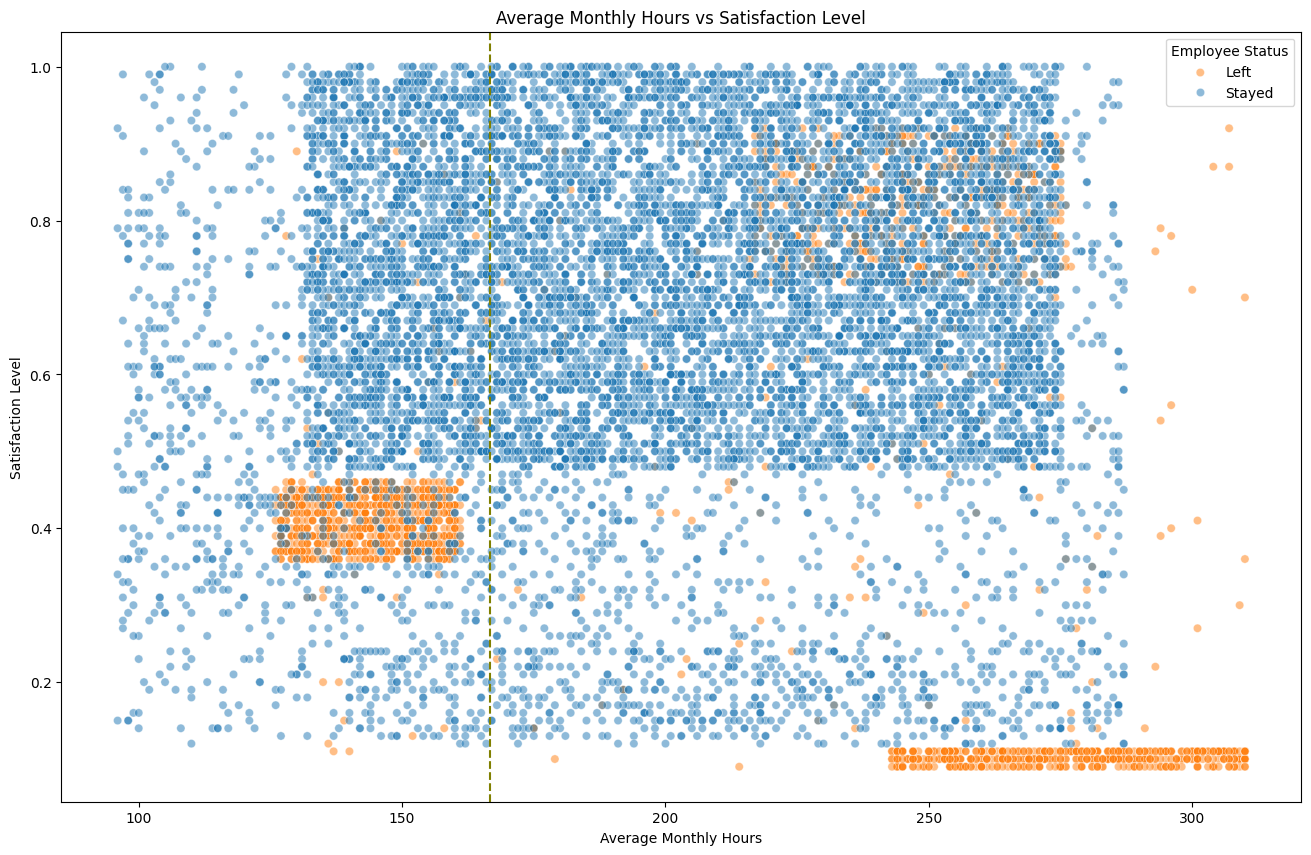

In [7]:
# Scatterplot of monthly working hours and setisfaction level
plt.figure(figsize=(16, 10))

# Scatterplot with hue to differentiate employees who left vs. stayed
sns.scatterplot(x='average_monthly_hours', y='satisfaction_level', hue='left', data=df, alpha=0.5)

# Add titles and labels
plt.title('Average Monthly Hours vs Satisfaction Level')
plt.xlabel('Average Monthly Hours')
plt.ylabel('Satisfaction Level')

# Plot line with staandard working hours mean
plt.axvline(x=avg_monthly_hours, color='olive', linestyle='--', label='Avg Hours')

# Update the legend labels (0 -> Stayed, 1 -> Left)
plt.legend(title='Employee Status', labels=['Left', 'Stayed'])

# Show the plot
plt.show()

There are several very distinct clusters of the employees who left on the above scatterplot.

1. There was a sizeable group of employees who worked 240–320 hours per month. 320 hours per month is over 75 hours per week for a whole year. It's likely this is related to their satisfaction levels being close to zero.

2. The plot also shows another group of people who left, those who had more normal working hours. Even so, their satisfaction was only around 0.4. It's difficult to speculate about why they might have left. It's possible they felt pressured to work more, considering so many of their peers worked more. And that pressure could have lowered their satisfaction levels.

3. There is a group who worked 220–280 hours per month, and they had satisfaction levels ranging ~0.7–0.9.

The clusters of employees who left are very distinct, suggesting some data modification.

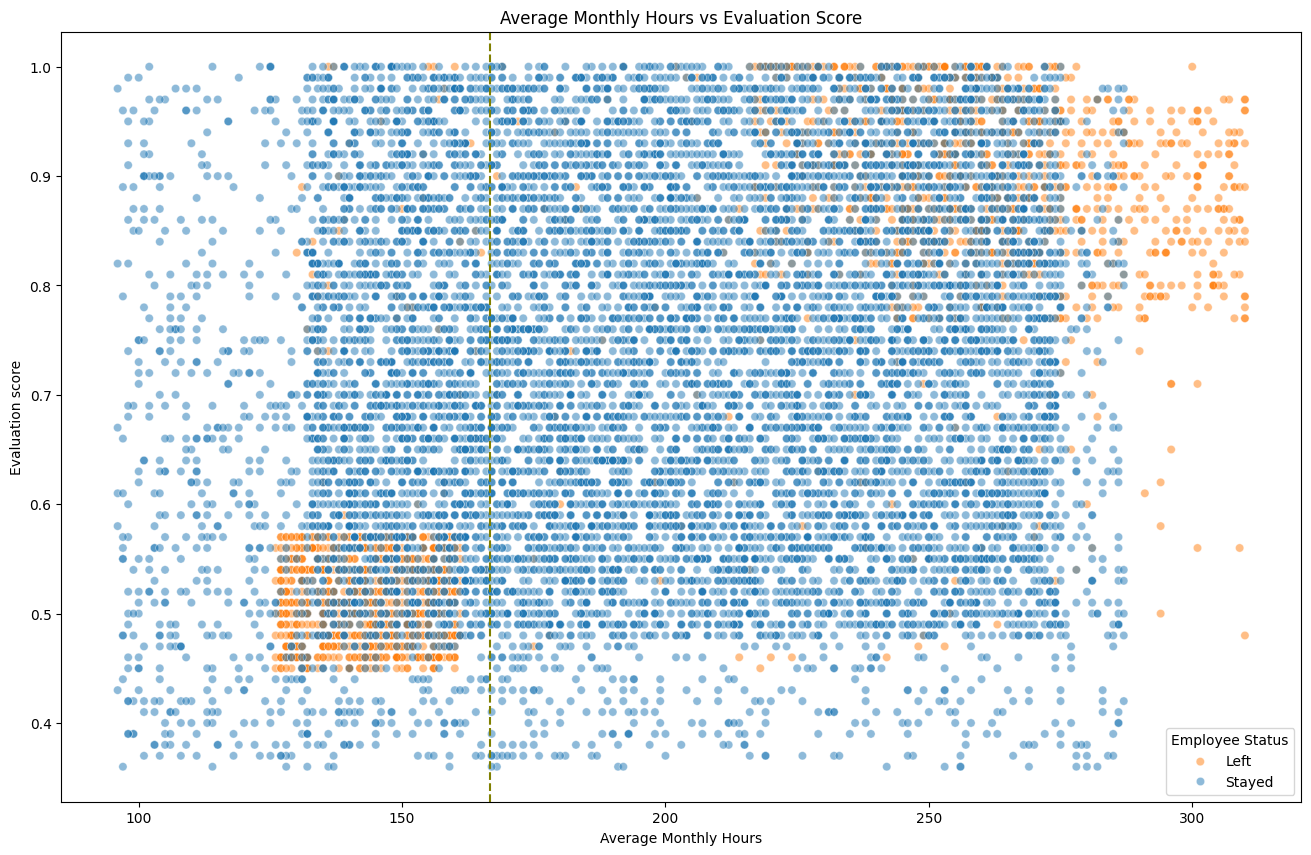

In [8]:
# Explore whether there's a correlation between working long hours and receiving high evaluation scores
plt.figure(figsize=(16, 10))

# Scatterplot with hue to differentiate employees who left vs. stayed
sns.scatterplot(x='average_monthly_hours', y='last_evaluation', hue='left', data=df, alpha=0.5)

# Add titles and labels
plt.title('Average Monthly Hours vs Evaluation Score')
plt.xlabel('Average Monthly Hours')
plt.ylabel('Evaluation score')

# Plot line with staandard working hours mean
plt.axvline(x=avg_monthly_hours, color='olive', linestyle='--', label='Avg Hours')

# Update the legend labels (0 -> Stayed, 1 -> Left)
plt.legend(title='Employee Status', labels=['Left', 'Stayed'])

# Show the plot
plt.show()

There are two clusers of employees who left the company compared to the other class:

1. Overworked employees who performed very well 
2. Employees who worked slightly under the nominal monthly average of 166.67 hours with lower evaluation scores.

Other observations from the plot:
- There seems to be a correlation between hours worked and evaluation score.
- There isn't a high percentage of employees in the upper left quadrant of this plot; but working long hours doesn't guarantee a good evaluation score.
- Most of the employees in this company work well over 166.67 hours per month.

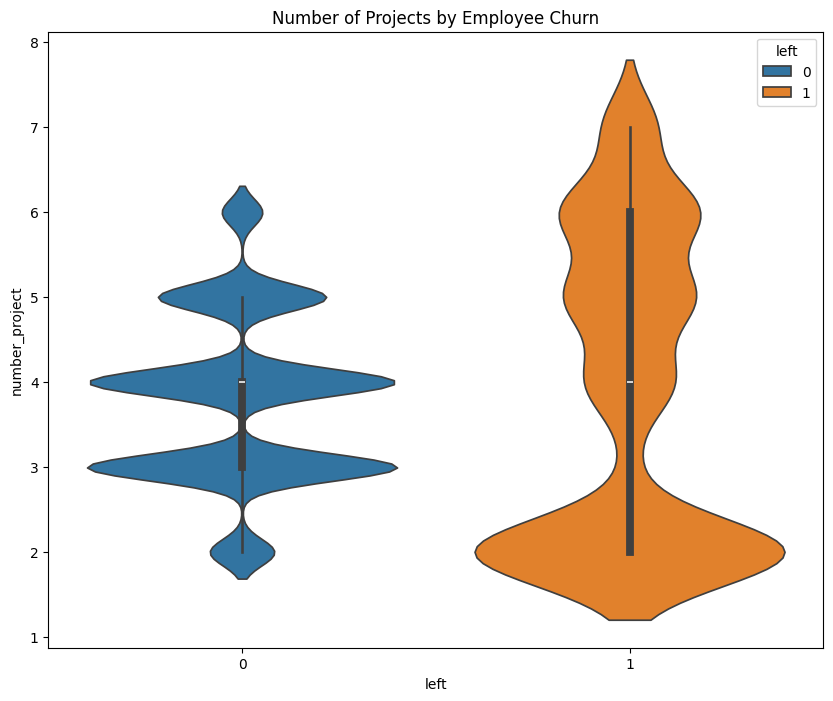

In [9]:
# Visualize the distribution of projects handled by employees who left versus those who stayed.
plt.figure(figsize=(10, 8))

sns.violinplot(x='left', y='number_project', data=df, hue='left')
plt.title('Number of Projects by Employee Churn')
plt.show()

According to the violin plot above, majority of the employees who left were having 6+ projects or less than 2 projects, showing two rather distinct groups. 

The optimal number of projects for employees to work on seems to be 3-4. The ratio of left/stayed is very small for these cohorts.

In [10]:
# Get range of values for number of projects
print(df['number_project'].value_counts())

# Find out how many employees with 7 projects left the company 
print(df[df['number_project'] == 7]['left'].value_counts())

# Find out how many employees with 2 projects left the company
print(df[df['number_project'] == 2]['left'].value_counts())

4    3685
3    3520
5    2233
2    1582
6     826
7     145
Name: number_project, dtype: int64
1    145
Name: left, dtype: int64
1    857
0    725
Name: left, dtype: int64


Every employee working on 7 projects and more than half of employees working on 2 projects left the company. 

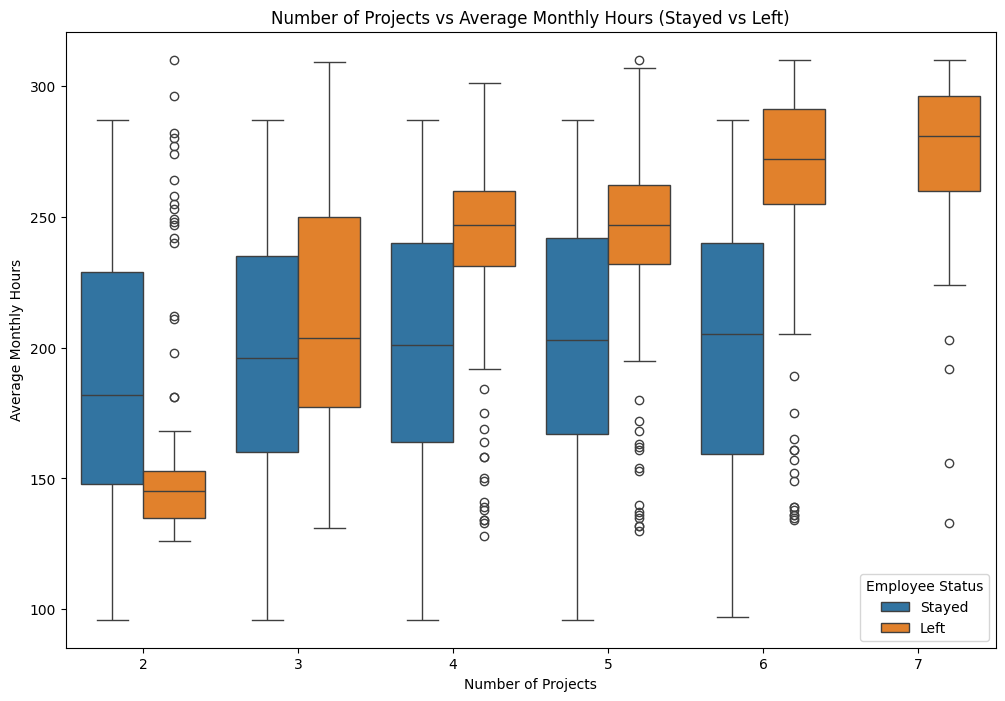

In [11]:
# Explore number of projects and working hours with relation to stayed/left status
plt.figure(figsize=(12, 8))

# Create a boxplot for number of projects vs average monthly hours, split by whether employees left or stayed
sns.boxplot(x='number_project', y='average_monthly_hours', hue='left', data=df)

# Update the legend to meaningful labels but keep the color intact
handles, labels = plt.gca().get_legend_handles_labels()

# Replace '0' and '1' with 'Stayed' and 'Left' in the labels while keeping the color mapping
new_labels = ['Stayed' if label == '0' else 'Left' for label in labels]

# Set the updated legend
plt.legend(handles=handles, labels=new_labels, title='Employee Status')

# Add labels and title
plt.title('Number of Projects vs Average Monthly Hours (Stayed vs Left)')
plt.xlabel('Number of Projects')
plt.ylabel('Average Monthly Hours')

# Show the plot
plt.show()

It is possible to say that number of working hours are somewhat correlated with the amount of projects as both tend to increase or decrease together. 
There are two groups of employees who left the company: 
- those who worked considerably less than their peers with the same number of projects
- those who worked much more with similar number of projects and all employees working on 7 projects.

Also, assuming a work week of 40 hours, every group of workers with 3+ projects even those who didn't leave the company — worked considerably more than 166.67 hours a month. It seems that employees here are overworked.

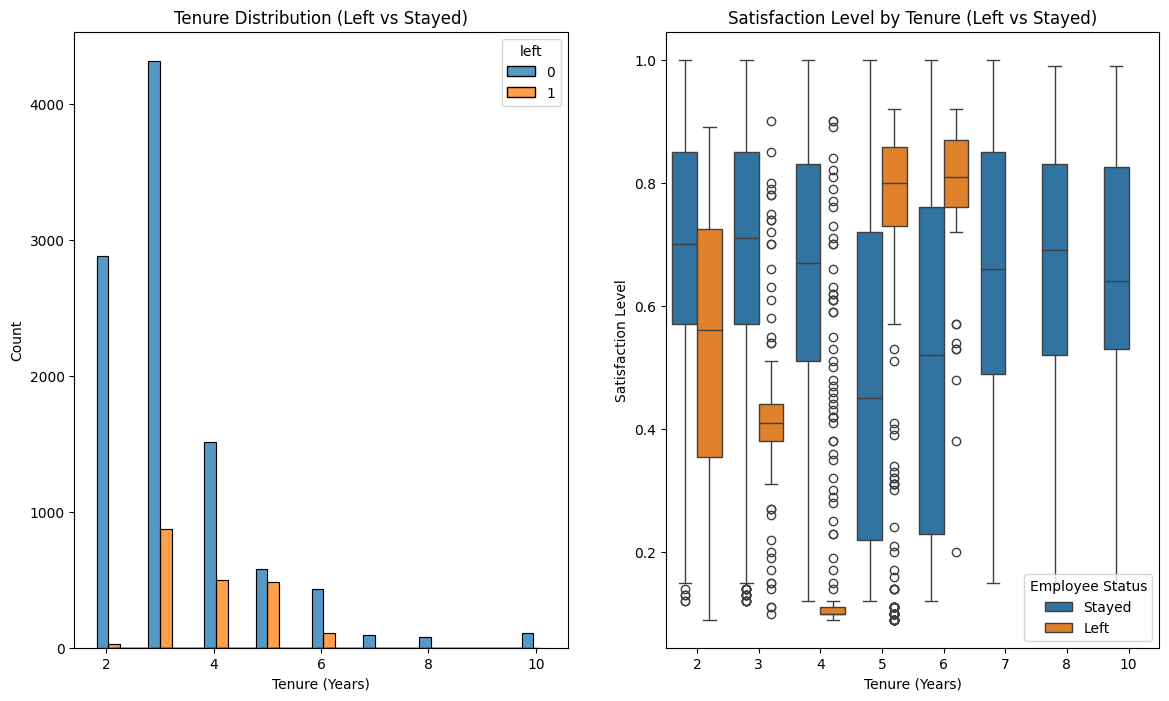

In [12]:
# Histogram of tenure duration and satisfaction levels

# Create a figure with two subplots
plt.figure(figsize=(14, 8))

# Subplot 1: Tenure Histogram (Separated by Left/Stayed)
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='tenure', hue='left', multiple='dodge', shrink=5)
plt.title('Tenure Distribution (Left vs Stayed)')
plt.xlabel('Tenure (Years)')
plt.ylabel('Count')

# Subplot 2: Satisfaction Level by Tenure (Boxplot for Left vs Stayed)
plt.subplot(1, 2, 2)
sns.boxplot(x='tenure', y='satisfaction_level', hue='left', data=df)
plt.title('Satisfaction Level by Tenure (Left vs Stayed)')
plt.xlabel('Tenure (Years)')
plt.ylabel('Satisfaction Level')

# Update the legend
handles, labels = plt.gca().get_legend_handles_labels()

# Replace '0' and '1' with 'Stayed' and 'Left' in the labels while keeping the color mapping
new_labels = ['Stayed' if label == '0' else 'Left' for label in labels]

# Set the updated legend
plt.legend(handles=handles, labels=new_labels, title='Employee Status', loc='lower right')

# Show the plot
plt.show()

Based on two tenure charts above:

* all employees who work longer than 6 years, stay in the company. There are relatively few longer-tenured employees. It's possible that they're the higher-ranking, higher-paid employees.
* employees tend to stay if they work 2 or less years or 6 or more years in the company
* slightly less than half of employees with 5 year tenure leave
* 4 year employees who left seem to have an unusually low satisfaction level. It's worth investigating changes to company policy that might have affected people specifically at the four-year mark, if possible. 
* there seem to be two categories: dissatisfied employees with shorter tenures and very satisfied employees with medium-length tenures.
    

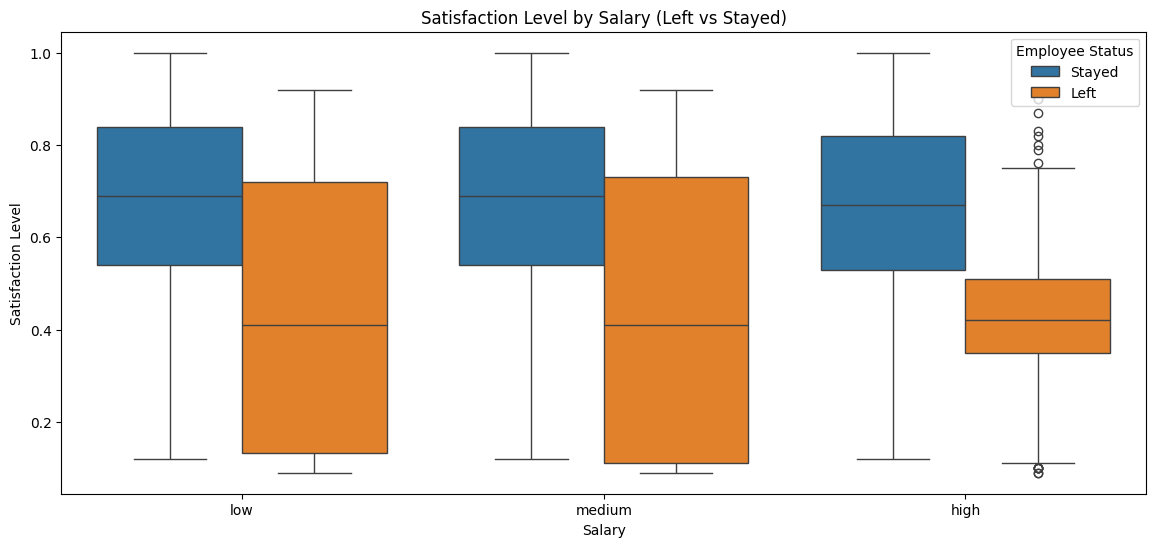

In [13]:
# Explore salary and satisfaction levels by left or stayed status
plt.figure(figsize=(14, 6))

# Boxplot for Salary vs Satisfaction Level (Left vs Stayed)
sns.boxplot(x='salary', y='satisfaction_level', hue='left', data=df)
plt.title('Satisfaction Level by Salary (Left vs Stayed)')
plt.xlabel('Salary')
plt.ylabel('Satisfaction Level')

# Update the legend
handles, labels = plt.gca().get_legend_handles_labels()

# Replace '0' and '1' with 'Stayed' and 'Left' in the labels while keeping the color mapping
new_labels = ['Stayed' if label == '0' else 'Left' for label in labels]

# Set the updated legend
plt.legend(handles=handles, labels=new_labels, title='Employee Status', loc='upper right')

# Show the plot
plt.show()

Employees who left tend to have lower satisfaction levels in all 3 salary groups.

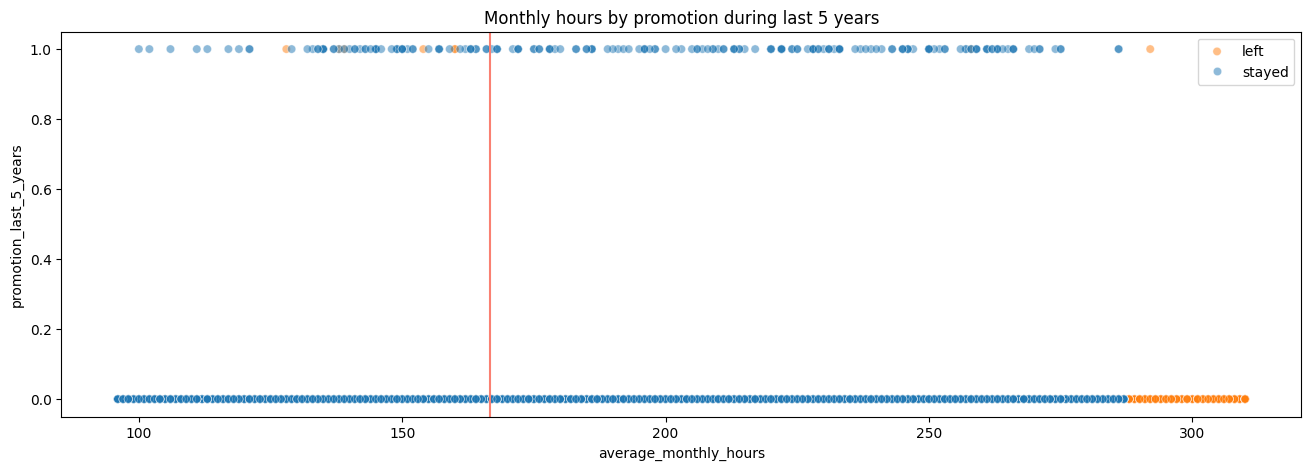

In [14]:
# Relationship between 'average_monthly_hours' and 'promotion_last_5_years'
plt.figure(figsize=(16, 5))

# Plot a scatterplot
sns.scatterplot(data=df, x='average_monthly_hours', y='promotion_last_5_years', hue='left', alpha=0.5)

# Add a horixontal line with standard monthly working hours 
plt.axvline(x=avg_monthly_hours, color='salmon')

plt.legend(labels=['left', 'stayed'])

plt.title('Monthly hours by promotion during last 5 years')

plt.show()

The scatterplot above shows the following:

- very few employees who were promoted in the last five years left
- very few employees who worked the most hours were promoted
- all of the employees who left were working the longest hours

In [15]:
# Find out whether work accidents affected employee churn

# Group the data by 'work_accident' and 'left' and count the number of employees in each category
accident_counts = df.groupby(['work_accident', 'left']).size().unstack()

# Calculate the total number of employees in each work_accident category
total_by_accident = df['work_accident'].value_counts()

# Calculate the percentage of employees who stayed or left in each work_accident category
percentage_stayed = (accident_counts[0] / total_by_accident) * 100
percentage_left = (accident_counts[1] / total_by_accident) * 100

# Display the percentages
print("Percentage of employees who stayed by work accident status:")
print(percentage_stayed)
print("Percentage of employees who left by work accident status:")
print(percentage_left)

Percentage of employees who stayed by work accident status:
work_accident
0    81.402229
1    94.324324
dtype: float64
Percentage of employees who left by work accident status:
work_accident
0    18.597771
1     5.675676
dtype: float64


- 18.6% of employees who didn’t have an accident left, and 81.4% stayed.
- 5.6% of employees who had an accident left, and 94.3% stayed.

There doesn’t seem to be a strong correlation between having a work accident and leaving the company. Employees who had an accident have a higher tendency to stay.

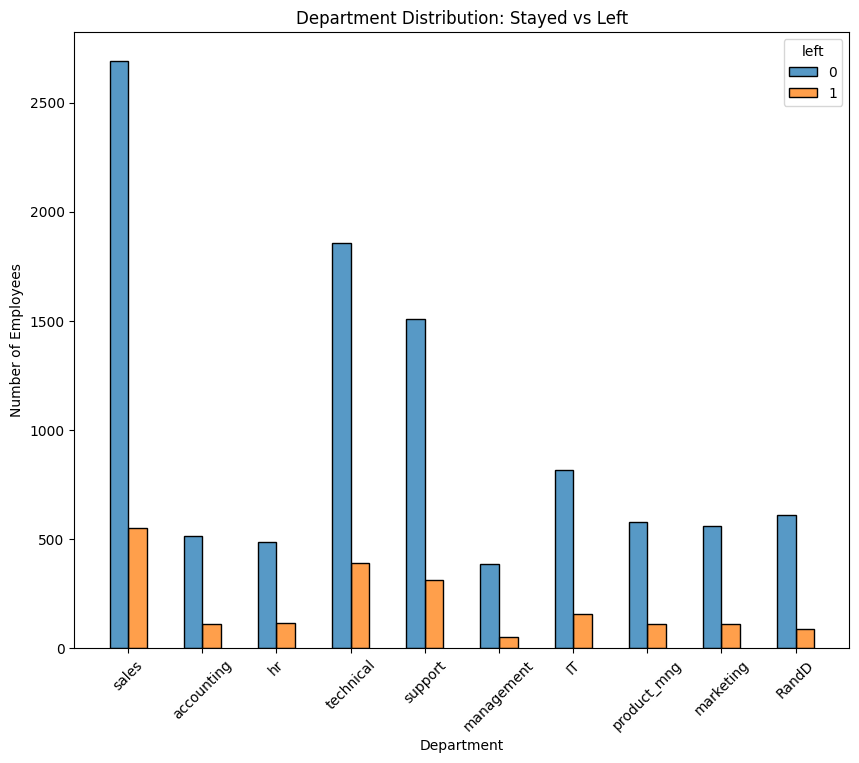

In [16]:
# Compare department distribution of employees who left to that of employees who didn't

plt.figure(figsize=(10, 8))

# Plot the histograms
sns.histplot(data=df, x='department', hue='left', discrete=1, 
              multiple='dodge', shrink=.5)

# Add labels and title
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.title('Department Distribution: Stayed vs Left')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

There doesn't seem to be any department that differs significantly in its proportion of employees who left to those who stayed. 


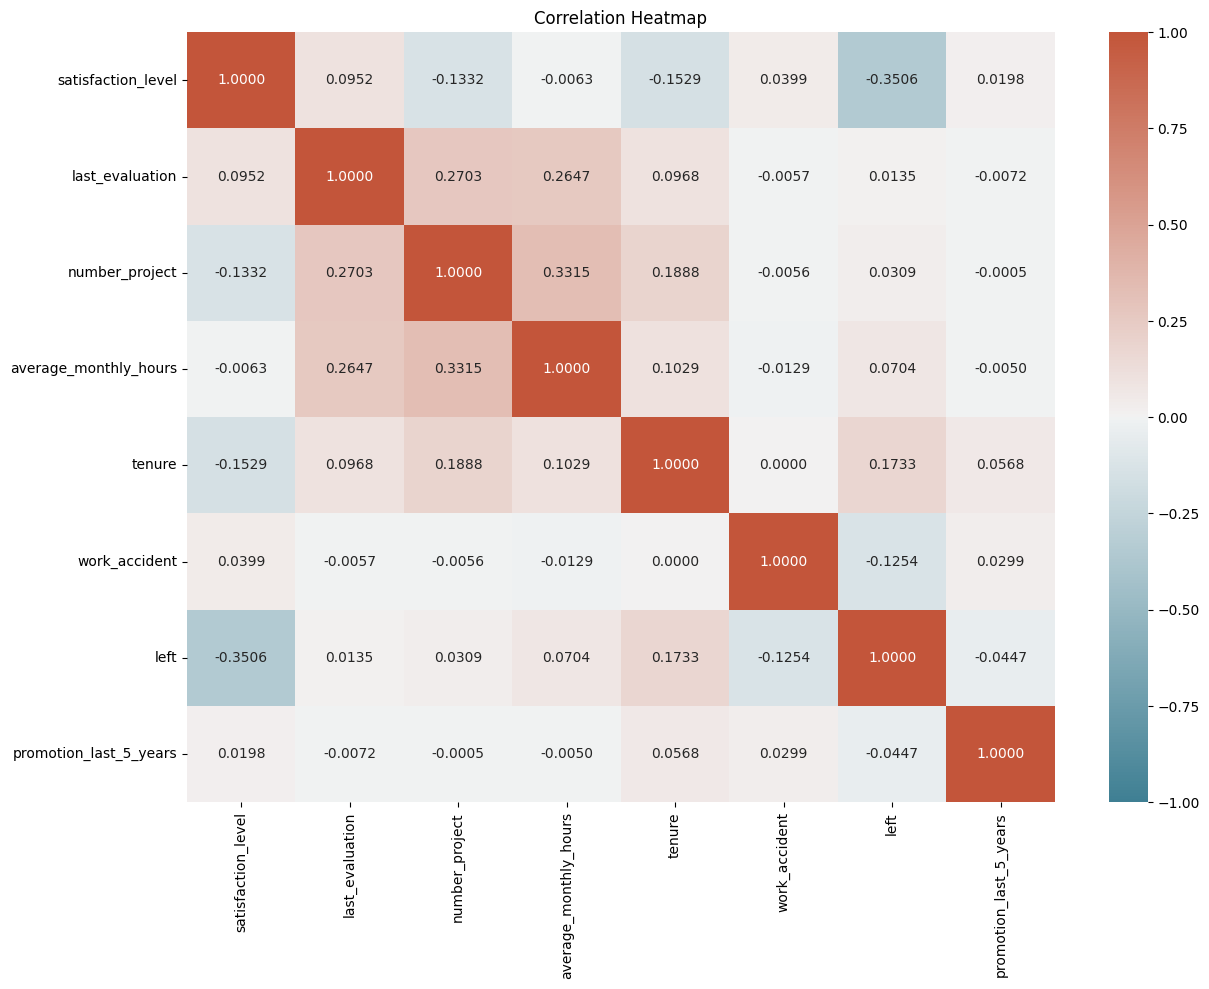

In [17]:
# Heatmap for correlation between features
plt.figure(figsize=(14, 10))

# Build heatmap of feature correlations setting the range of values between -1 and 1 and suppressing scientific notation 
sns.heatmap(df.corr(numeric_only=True), 
            vmin=-1, vmax=1, annot=True, 
            cmap=sns.diverging_palette(220, 20, as_cmap=True),
            fmt=".4f",) 

# Show the plot
plt.title('Correlation Heatmap')

plt.show()

The correlation heatmap shows that the number of projects, monthly hours, and evaluation scores all have some positive correlation with each other, and whether an employee leaves is negatively correlated with their satisfaction level.

### Insights

It appears that leaving is tied to longer working hours, many projects, and generally lower satisfaction levels. It can be ungratifying to work long hours and not receive promotions or good evaluation scores. There's a sizeable group of employees at this company who are probably burned out. It also appears that if an employee has spent more than six years at the company, they tend not to leave.